In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preparing Data

In [3]:
# read data
data = pd.read_excel(r'/content/drive/MyDrive/TA (1)/Processing Data/Data/raw data/data_after_cleansing.xlsx',sheet_name="Baron")
data

,Date,Hours,Hs [m],Angin [m/s]
0,2014-07-14 07:56:00,1,2.060,3.618206
1,2014-07-14 08:56:00,2,2.326,3.325107
2,2014-07-14 09:56:00,3,2.280,3.218061
3,2014-07-14 10:56:00,4,2.280,2.976261
4,2014-07-14 11:56:00,5,2.326,2.594406
...,...,...,...,...
1256,2014-09-04 15:56:00,1257,1.098,0.853453
1257,2014-09-04 16:56:00,1258,1.044,0.119597
1258,2014-09-04 17:56:00,1259,1.098,0.681651
1259,2014-09-04 18:56:00,1260,0.966,1.093551


In [4]:
data.iloc[746:748]

,Date,Hours,Hs [m],Angin [m/s]
746,2014-08-14 09:56:00,747,1.631,4.198140
747,2014-08-14 10:56:00,748,NaN,3.887883


In [ ]:
len(data)

1261

In [ ]:
746/len(data)

0.591593973037272

In [ ]:
data.iloc[885:888]

,Date,Hours,Hs [m],Angin [m/s]
885,2014-08-20 04:56:00,886,NaN,3.692239
886,2014-08-20 05:56:00,887,1.459,3.370224
887,2014-08-20 06:56:00,888,1.631,2.219791


In [ ]:
len(data.iloc[886:])

375

In [ ]:
375/len(data)

0.2973830293417922

In [ ]:
10/100*len(data)

126.10000000000001

In [ ]:
data.iloc[886:886+126]

,Date,Hours,Hs [m],Angin [m/s]
886,2014-08-20 05:56:00,887,1.459,3.370224
887,2014-08-20 06:56:00,888,1.631,2.219791
888,2014-08-20 07:56:00,889,1.595,1.668452
889,2014-08-20 08:56:00,890,1.426,1.019182
890,2014-08-20 09:56:00,891,1.595,0.870233
...,...,...,...,...
1007,2014-08-25 06:56:00,1008,3.055,3.314413
1008,2014-08-25 07:56:00,1009,2.569,2.803444
1009,2014-08-25 08:56:00,1010,2.671,2.575072
1010,2014-08-25 09:56:00,1011,2.776,2.337188


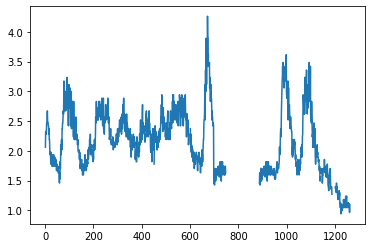

In [5]:
# plotting raw data
plt.plot(data['Hours'],data['Hs [m]'])
plt.show()

In [6]:
import copy
data_raw = copy.deepcopy(data)

### Interpolation

In [7]:
# import library
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [8]:
# define other dataframe for interpolate 
data2 = copy.deepcopy(data)
data3 = copy.deepcopy(data)
data4 = copy.deepcopy(data)

In [9]:
# drop NaN value in dataframe data
data = data.dropna()

In [10]:
# cubic interpolation
y_fc=interp1d(data['Hours'],data['Hs [m]'], kind='cubic')

In [11]:
# quadratic interpolation
y_fq=interp1d(data['Hours'],data['Hs [m]'], kind='quadratic')

In [12]:
y_fc=CubicSpline(data['Hours'],data['Hs [m]'],extrapolate=True)

In [13]:
# linear interpolation
y_fl=interp1d(data['Hours'],data['Hs [m]'], kind='linear')

In [14]:
# interpolate using function we define before
import math

for i in data2['Hours'] :
  if math.isnan(data2['Hs [m]'][i-1])== True:
    data2['Hs [m]'][i-1] = y_fc(i)
    data3['Hs [m]'][i-1] = y_fq(i)
    data4['Hs [m]'][i-1] = y_fl(i)
  else:
    pass
#data.loc[data['Hs [m]'].isna()]

<ipython-input-14-86623d2f7eed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Hs [m]'][i-1] = y_fc(i)
<ipython-input-14-86623d2f7eed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Hs [m]'][i-1] = y_fq(i)
<ipython-input-14-86623d2f7eed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Hs [m]'][i-1] = y_fl(i)


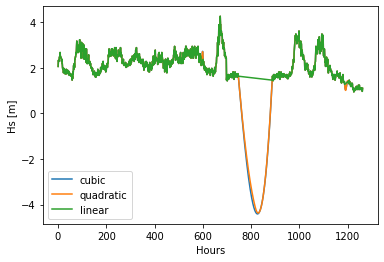

In [15]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
plt.plot(data3['Hours'],data3['Hs [m]'], label ='quadratic')
plt.plot(data4['Hours'],data4['Hs [m]'], label ='linear')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

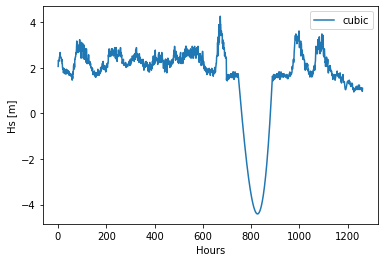

In [16]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

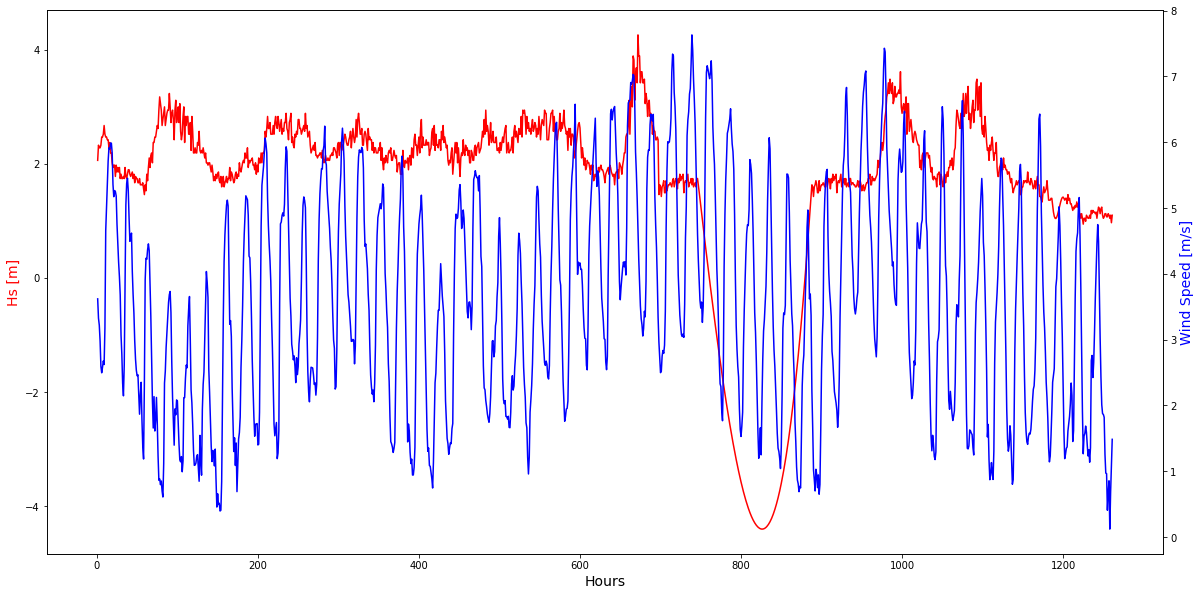

In [17]:
# plotting wind and wave
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(data2['Hours'],
        data2['Hs [m]'],
        color="red", 
        )
# set x-axis label
ax.set_xlabel("Hours", fontsize = 14)
# set y-axis label
ax.set_ylabel("Hs [m]",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data2['Hours'],
        data2['Angin [m/s]'],color="blue")
ax2.set_ylabel("Wind Speed [m/s]",color="blue",fontsize=14)
plt.show()

karena data tidak berdistribusi normal -> ada skew nya (positif) makanya buat scaling data pake -> Normalize Data

## splitting data

In [18]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


values = data2.values
values = values[:,2:]
values

array([[2.06, 3.618206148],
       [2.326, 3.325107297],
       [2.28, 3.218060913],
       ...,
       [1.098, 0.681650663],
       [0.966, 1.09355055],
       [1.098, 1.483698455]], dtype=object)

In [19]:
# ensure all data is float
values = values.astype('float32')

In [20]:
# normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# scaled 

In [21]:
# frame as supervised learning
reframed = series_to_supervised(values, 2, 1) #data, window width , output size
reframed.head()

,var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
2,2.060,3.618206,2.326,3.325107,2.280,3.218061
3,2.326,3.325107,2.280,3.218061,2.280,2.976261
4,2.280,3.218061,2.280,2.976261,2.326,2.594406
5,2.280,2.976261,2.326,2.594406,2.469,2.494562
6,2.326,2.594406,2.469,2.494562,2.469,2.577308


In [22]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[-1], axis=1, inplace=True)
print(reframed.head())

   var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)  var1(t)
2      2.060   3.618206      2.326   3.325107    2.280
3      2.326   3.325107      2.280   3.218061    2.280
4      2.280   3.218061      2.280   2.976261    2.326
5      2.280   2.976261      2.326   2.594406    2.469
6      2.326   2.594406      2.469   2.494562    2.469


In [23]:
reframed.shape


(1259, 5)

In [24]:
len(reframed)

1259

In [25]:
values = reframed.values

In [26]:
# split into train and test sets
train = values[:746, :]
val = values[886:886+126 , :]
test = values[886+126:, :]

In [27]:
n_hours = 2
n_features = 2
n_obs = n_hours * n_features
X_train1, y_train1 =train[:, :n_obs], train[:, -1]
X_val1, y_val1 = val[:, :n_obs], val[:, -1]
X_test1, y_test1 = test[:, :n_obs], test[:, -1]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((746, 4), (746,), (126, 4), (126,), (247, 4), (247,))

In [28]:
# reshape input to be 3D [samples, timesteps, features]
X_train1 = X_train1.reshape((X_train1.shape[0],n_hours , n_features))
X_val1 = X_val1.reshape((X_val1.shape[0],n_hours,n_features))
X_test1 = X_test1.reshape((X_test1.shape[0], n_hours, n_features))
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((746, 2, 2), (746,), (126, 2, 2), (126,), (247, 2, 2), (247,))

## Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((2, 2)))
model1.add(LSTM(200, activation='relu'))
model1.add(RepeatVector(1))
model1.add(LSTM(200, activation='relu', return_sequences=True))
model1.add(TimeDistributed(Dense(100, activation='relu')))
model1.add(TimeDistributed(Dense(1)))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               162400    
                                                                 
 repeat_vector (RepeatVector  (None, 1, 200)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 200)            320800    
                                                                 
 time_distributed (TimeDistr  (None, 1, 100)           20100     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 1)             101       
 tributed)                                                       
                                                        

In [30]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [31]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1])

Epoch 1/50
23/24 [===========================>..] - ETA: 0s - loss: 5.2081 - root_mean_squared_error: 2.2821

24/24 [==============================] - 6s 173ms/step - loss: 5.2158 - root_mean_squared_error: 2.2827 - val_loss: 4.4687 - val_root_mean_squared_error: 2.0987
Epoch 2/50
22/24 [==========================>...] - ETA: 0s - loss: 4.8418 - root_mean_squared_error: 2.2004

24/24 [==============================] - 3s 134ms/step - loss: 4.8365 - root_mean_squared_error: 2.1990 - val_loss: 3.9806 - val_root_mean_squared_error: 1.9801
Epoch 3/50
19/24 [======================>.......] - ETA: 0s - loss: 4.3224 - root_mean_squared_error: 2.0790

24/24 [==============================] - 3s 124ms/step - loss: 4.2138 - root_mean_squared_error: 2.0561 - val_loss: 3.1285 - val_root_mean_squared_error: 1.7544
Epoch 4/50
19/24 [======================>.......] - ETA: 0s - loss: 3.2364 - root_mean_squared_error: 1.7990

24/24 [==============================] - 3s 150ms/step - loss: 3.1173 - root_mean_squared_error: 1.7686 - val_loss: 1.6844 - val_root_mean_squared_error: 1.2856
Epoch 5/50
24/24 [==============================] - ETA: 0s - loss: 1.5143 - root_mean_squared_error: 1.2329

24/24 [==============================] - 3s 145ms/step - loss: 1.5143 - root_mean_squared_error: 1.2329 - val_loss: 0.6343 - val_root_mean_squared_error: 0.7948
Epoch 6/50
24/24 [==============================] - 0s 10ms/step - loss: 0.7701 - root_mean_squared_error: 0.8790 - val_loss: 0.7246 - val_root_mean_squared_error: 0.8529
Epoch 7/50
19/24 [======================>.......] - ETA: 0s - loss: 0.6539 - root_mean_squared_error: 0.8086

24/24 [==============================] - 3s 144ms/step - loss: 0.6550 - root_mean_squared_error: 0.8103 - val_loss: 0.5278 - val_root_mean_squared_error: 0.7273
Epoch 8/50
19/24 [======================>.......] - ETA: 0s - loss: 0.5826 - root_mean_squared_error: 0.7633

24/24 [==============================] - 3s 125ms/step - loss: 0.5614 - root_mean_squared_error: 0.7504 - val_loss: 0.4594 - val_root_mean_squared_error: 0.6788
Epoch 9/50
19/24 [======================>.......] - ETA: 0s - loss: 0.4929 - root_mean_squared_error: 0.7021

24/24 [==============================] - 4s 167ms/step - loss: 0.4868 - root_mean_squared_error: 0.6984 - val_loss: 0.3788 - val_root_mean_squared_error: 0.6162
Epoch 10/50
20/24 [========================>.....] - ETA: 0s - loss: 0.4154 - root_mean_squared_error: 0.6445

24/24 [==============================] - 3s 128ms/step - loss: 0.4299 - root_mean_squared_error: 0.6555 - val_loss: 0.3402 - val_root_mean_squared_error: 0.5841
Epoch 11/50
23/24 [===========================>..] - ETA: 0s - loss: 0.3917 - root_mean_squared_error: 0.6259

24/24 [==============================] - 3s 144ms/step - loss: 0.3903 - root_mean_squared_error: 0.6255 - val_loss: 0.2911 - val_root_mean_squared_error: 0.5403
Epoch 12/50
18/24 [=====================>........] - ETA: 0s - loss: 0.3758 - root_mean_squared_error: 0.6130

24/24 [==============================] - 3s 123ms/step - loss: 0.3594 - root_mean_squared_error: 0.6008 - val_loss: 0.2644 - val_root_mean_squared_error: 0.5149
Epoch 13/50
23/24 [===========================>..] - ETA: 0s - loss: 0.3370 - root_mean_squared_error: 0.5805

24/24 [==============================] - 5s 226ms/step - loss: 0.3406 - root_mean_squared_error: 0.5815 - val_loss: 0.2377 - val_root_mean_squared_error: 0.4881
Epoch 14/50
19/24 [======================>.......] - ETA: 0s - loss: 0.3229 - root_mean_squared_error: 0.5682

24/24 [==============================] - 3s 139ms/step - loss: 0.3230 - root_mean_squared_error: 0.5657 - val_loss: 0.2277 - val_root_mean_squared_error: 0.4778
Epoch 15/50
21/24 [=========================>....] - ETA: 0s - loss: 0.3194 - root_mean_squared_error: 0.5651

24/24 [==============================] - 3s 123ms/step - loss: 0.3152 - root_mean_squared_error: 0.5617 - val_loss: 0.2143 - val_root_mean_squared_error: 0.4634
Epoch 16/50
19/24 [======================>.......] - ETA: 0s - loss: 0.3063 - root_mean_squared_error: 0.5535

24/24 [==============================] - 3s 146ms/step - loss: 0.3083 - root_mean_squared_error: 0.5552 - val_loss: 0.2093 - val_root_mean_squared_error: 0.4580
Epoch 17/50
21/24 [=========================>....] - ETA: 0s - loss: 0.2937 - root_mean_squared_error: 0.5420

24/24 [==============================] - 3s 149ms/step - loss: 0.2913 - root_mean_squared_error: 0.5396 - val_loss: 0.2081 - val_root_mean_squared_error: 0.4567
Epoch 18/50
20/24 [========================>.....] - ETA: 0s - loss: 0.2874 - root_mean_squared_error: 0.5361

24/24 [==============================] - 3s 122ms/step - loss: 0.2900 - root_mean_squared_error: 0.5378 - val_loss: 0.2062 - val_root_mean_squared_error: 0.4546
Epoch 19/50
20/24 [========================>.....] - ETA: 0s - loss: 0.2779 - root_mean_squared_error: 0.5272

24/24 [==============================] - 3s 140ms/step - loss: 0.2829 - root_mean_squared_error: 0.5318 - val_loss: 0.2011 - val_root_mean_squared_error: 0.4487
Epoch 20/50
24/24 [==============================] - 0s 10ms/step - loss: 0.2741 - root_mean_squared_error: 0.5231 - val_loss: 0.2051 - val_root_mean_squared_error: 0.4534
Epoch 21/50
24/24 [==============================] - 0s 11ms/step - loss: 0.2703 - root_mean_squared_error: 0.5210 - val_loss: 0.2027 - val_root_mean_squared_error: 0.4505
Epoch 22/50
18/24 [=====================>........] - ETA: 0s - loss: 0.2651 - root_mean_squared_error: 0.5148

24/24 [==============================] - 3s 151ms/step - loss: 0.2616 - root_mean_squared_error: 0.5123 - val_loss: 0.1995 - val_root_mean_squared_error: 0.4465
Epoch 23/50
24/24 [==============================] - 0s 14ms/step - loss: 0.2581 - root_mean_squared_error: 0.5085 - val_loss: 0.2024 - val_root_mean_squared_error: 0.4500
Epoch 24/50
24/24 [==============================] - 0s 15ms/step - loss: 0.2553 - root_mean_squared_error: 0.5051 - val_loss: 0.2061 - val_root_mean_squared_error: 0.4541
Epoch 25/50
24/24 [==============================] - 0s 14ms/step - loss: 0.2510 - root_mean_squared_error: 0.5020 - val_loss: 0.2087 - val_root_mean_squared_error: 0.4569
Epoch 26/50
24/24 [==============================] - 0s 15ms/step - loss: 0.2444 - root_mean_squared_error: 0.4951 - val_loss: 0.2094 - val_root_mean_squared_error: 0.4576
Epoch 27/50
24/24 [==============================] - 0s 10ms/step - loss: 0.2388 - root_mean_squared_error: 0.4903 - val_loss: 0.2113 - val_root_mean_s

In [32]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [52]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Multivariate':train_predictions, 'Actuals':y_train1})
train_results

24/24 [==============================] - 0s 3ms/step


,Multivariate,Actuals
0,2.080031,2.280000
1,2.171402,2.280000
2,2.146930,2.326000
3,2.150702,2.469000
4,2.211037,2.469000
...,...,...
741,2.208696,1.595000
742,2.126985,1.741000
743,2.048555,1.741000
744,1.989575,1.631000


In [34]:

len(train_predictions), len(y_train1)

(746, 746)

In [35]:
# # invert scalling 
# inv_train_results = scaler.inverse_transform(train_results)
# inv_train_results = pd.DataFrame(inv_train_results )
# inv_train_results 

In [36]:
# # change the column name
# inv_train_results.columns = ['Train Predictions', 'Actuals']
# inv_train_results


In [53]:
train_results['Date'] = data2['Date'].iloc[:746]
train_results.head()

,Multivariate,Actuals,Date
0,2.080031,2.280,2014-07-14 07:56:00
1,2.171402,2.280,2014-07-14 08:56:00
2,2.146930,2.326,2014-07-14 09:56:00
3,2.150702,2.469,2014-07-14 10:56:00
4,2.211037,2.469,2014-07-14 11:56:00


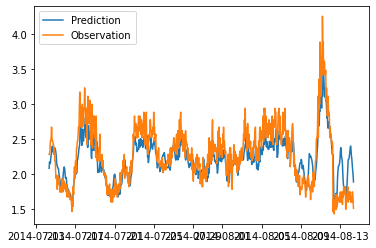

In [54]:
import matplotlib.pyplot as plt
plt.plot(train_results['Date'],train_results['Multivariate'], label ='Prediction')
plt.plot(train_results['Date'],train_results['Actuals'], label='Observation')
plt.legend(loc='best')

In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Multivariate'],
                    mode='lines',
                    name='Fitting Data Training'))
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [56]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Multivariate':val_predictions, 'Actuals':y_val1})
val_results.head()

4/4 [==============================] - 0s 3ms/step


,Multivariate,Actuals
0,1.645246,1.595
1,1.649293,1.426
2,1.559264,1.595
3,1.515603,1.631
4,1.583668,1.703


In [57]:
val_results['Date'] = data2['Date'].iloc[886:886+126].values
val_results.head()

,Multivariate,Actuals,Date
0,1.645246,1.595,2014-08-20 05:56:00
1,1.649293,1.426,2014-08-20 06:56:00
2,1.559264,1.595,2014-08-20 07:56:00
3,1.515603,1.631,2014-08-20 08:56:00
4,1.583668,1.703,2014-08-20 09:56:00


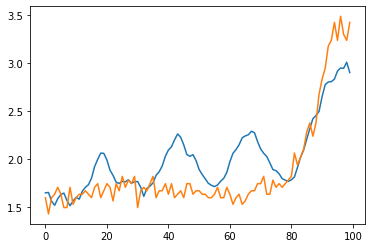

In [58]:
plt.plot(val_results['Multivariate'][:100])
plt.plot(val_results['Actuals'][:100])

In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Multivariate'],
                    mode='lines',
                    name='Fitting Data Validation'))
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [60]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Multivariate':test_predictions, 'Actuals':y_test1})
test_results.head()

8/8 [==============================] - 0s 4ms/step


,Multivariate,Actuals
0,2.222434,2.519
1,2.251077,2.569
2,2.330904,2.519
3,2.349223,2.421
4,2.308929,2.373


In [61]:
test_results['Date'] = data2['Date'].iloc[886+126:round(len(reframed))].values
test_results.head()

,Multivariate,Actuals,Date
0,2.222434,2.519,2014-08-25 11:56:00
1,2.251077,2.569,2014-08-25 12:56:00
2,2.330904,2.519,2014-08-25 13:56:00
3,2.349223,2.421,2014-08-25 14:56:00
4,2.308929,2.373,2014-08-25 15:56:00


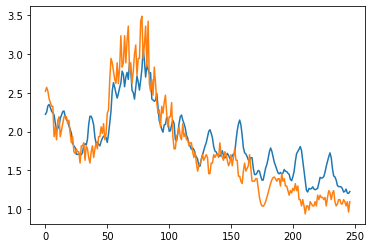

In [62]:
plt.plot(test_results['Multivariate'])
plt.plot(test_results['Actuals'])

In [47]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Multivariate'],
                    mode='lines',
                    name='Fitting Data Testing'))
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [63]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Multivariate'])
RMSE = math.sqrt(MSE)
RMSE

0.2858451725469907

In [64]:

from scipy.stats import pearsonr
corr, _ = pearsonr(test_results['Actuals'],test_results['Multivariate'])
corr

0.9195599619361466

In [65]:
# bias 
gap_sum = 0
for j in range(len(test_results['Actuals'])):
  gap = test_results['Multivariate'][j] - test_results['Actuals'][j]
  gap_sum += gap

bias = gap_sum/len(test_results['Actuals'])
bias

0.07773258473709045

In [66]:
train_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /multivariate_train_lstm_baron.csv')
val_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /multivariate_val_lstm_baron.csv')
test_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /multivariate_test_lstm_baron.csv')